## Урок 2. Домашнее задание 

### 2.1 Домашнее задание начального уровня

Вычислите евклидово расстояние между кластером *c1* и кластером *c3*. Это расстояние получилось меньше, или больше чем расстояние между кластером *c1* и кластером *c2*?

Координаты центра для трёх кластеров:

* "красный" кластер $c_1 = [1.0, 1.5]$
* "оранжевый" кластер $c_2 = [-1.0, -0.5]$
* "зеленый" кластер $c_3 = [1.0, -0.5]$

![clustering_example](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_example.png)

In [22]:
# -- ВАШ КОД ТУТ --
from scipy.spatial.distance import euclidean

c1 = [1.0, 1.5]
c2 = [-1.0, -0.5]
c3 = [1.0, -0.5]
dist12 = euclidean(c1, c2)
dist13 = euclidean(c1, c3)
print("Расстояние между кластерами c1 и c2: %.4f" % dist12)
print("Расстояние между кластерами c1 и c3: %.4f" % dist13)

Расстояние между кластерами c1 и c2: 2.8284
Расстояние между кластерами c1 и c3: 2.0000


##### Расстояние между центрами кластеров с1 и с3 меньше, чем у с1 и с2

В этом уроке мы познакомились с постановкой задачи кластеризации. Мы узнали, с помощью какой функции можно вычислить расстояние между двумя точками. В следующем уроке мы рассмотрим один из самых простых алгоритмов кластеризации, который назовём алгоритмом $k-$средних.

## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [23]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# -- ВАШ КОД ТУТ --


In [24]:
((clust[:,0] - centroid[0])**2).sum() + ((clust[:,1] - centroid[1])**2).sum()

16.31211696438564

## 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [25]:
# -- ВАШ КОД ТУТ --
import pickle
import numpy as np

with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])   

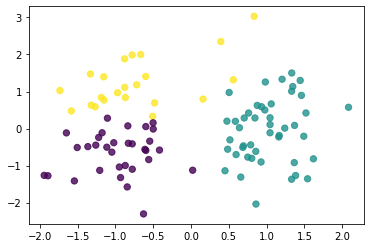

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show()

## 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

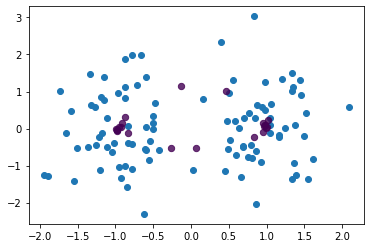

In [32]:
center = []
#print(X)
plt.scatter(X[:, 0], X[:, 1])#, s=40, c=1, marker='o', alpha=0.8, label='data')
for i in range(11):
    kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
    kmeans_model.fit(X)
    center.append(kmeans_model.cluster_centers_)
    plt.scatter(kmeans_model.cluster_centers_[0][0], kmeans_model.cluster_centers_[0][1], s=40, c=3, marker='o', alpha=0.8, label='data')
    plt.scatter(kmeans_model.cluster_centers_[1][0], kmeans_model.cluster_centers_[1][1], s=40, c=3, marker='o', alpha=0.8, label='data')
    #print(kmeans_model.cluster_centers_)

plt.show()

## Урок 8. Домашнее задание начального уровня


Обучите модель DBSCAN с параметром *min_samples=8*. Визуализируйте результат.

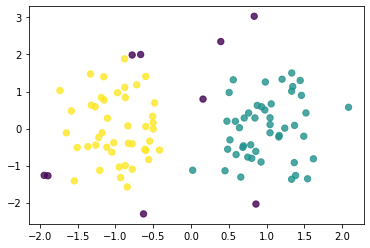

In [33]:
# -- ВАШ КОД ТУТ --
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(X)
labels = db.labels_
plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')

#### Мы теперь мы знаем уже два алгоритма кластеризации -  *k-means* и *DBSCAN*. Как же выяснить, какой алгоритм построил лучшую модель? Для этого надо бы придумать какие-то метрики для кластеризации. О том, как померять качество кластеризации, мы узнаем в следующем уроке

## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for i in [2,4]:
    kmeans_model = KMeans(n_clusters=i, random_state=42)
    kmeans_model.fit(X)
    score = silhouette_score(X, kmeans_model.labels_)
    print(f'Качество кластеризации при количестве кластеров, равном {i}, равно {score}')

Качество кластеризации при количестве кластеров, равном 2, равно 0.4465356047465253
Качество кластеризации при количестве кластеров, равном 4, равно 0.4417501080615704


##### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [39]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

for i in [2,3,4]:
    kmeans_model = KMeans(n_clusters=i, random_state=42)
    kmeans_model.fit(X)
    score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')
    print(f'Качество кластеризации при количестве кластеров, равном {i}, равно {score}')

Качество кластеризации при количестве кластеров, равном 2, равно 0.9286022516535728
Качество кластеризации при количестве кластеров, равном 3, равно 0.6138984071108895
Качество кластеризации при количестве кластеров, равном 4, равно 0.5827727212133398


##### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [42]:
import pandas as pd
df = pd.read_csv("clustering_hw.csv")
df.head()

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1


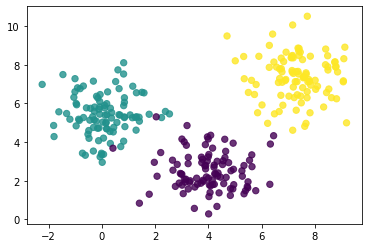

In [43]:
plt.scatter(df['x1'], df['x2'], s=40, c=df['y'], marker='o', alpha=0.8, label='data')

##### Бросается в глаза 3 кластера,  разбиение точно будет неидеальным из-за выбросов

In [44]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(df[['x1','x2']])

KMeans(n_clusters=3, random_state=42)

[[0.11472588 5.38816844]
 [7.32891777 7.36774138]
 [4.04379735 2.45403144]]


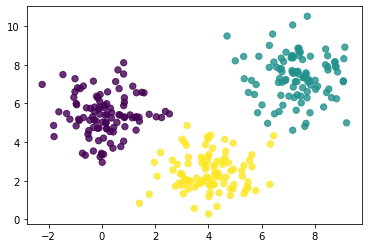

In [48]:
plt.scatter(df['x1'], df['x2'], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
print(kmeans_model.cluster_centers_)
plt.show()

###### Ожидаемо
Точка (5,8) принадлежит кластеру 2 (по нумерации с 1), точка (0,5) - к 1-му.

In [50]:
score = adjusted_mutual_info_score(df['y'], kmeans_model.labels_, average_method='arithmetic')
print(f'Качество кластеризации равно {score}')

Качество кластеризации равно 0.9700074953683859


## Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)